In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('iris.csv')

In [96]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
X = df.iloc[:,:2]
X.shape

(150, 2)

In [99]:
y = df['species']
y.shape

(150,)

In [100]:
y, y_index = pd.factorize(y)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [106]:
print(scaler.mean_)
print(scaler.var_)
print(scaler.scale_)

[5.83619048 3.02952381]
[0.71583311 0.18855692]
[0.84606921 0.43423141]


In [107]:
X_train = scaler.transform(X_train)

**Sta sada radimo sa test podacima (sto se tice scalera)?**
- Da li zelimo da napravimo novi scaler za testiranje i da njega primenimo ili
- Da iskoristimo postojeci scaler na test podatke

Odgovor je da ne smemo da pravimo novi, jer su test podaci oni koje dobijamo "sutra" tj. pravimo se da ih nemamo sada i ne mozemo nista trenirati i pripremati u odnostu na njih. Dakle, koristimo postojeci

In [108]:
X_test = scaler.transform(X_test)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
model = KNeighborsClassifier(n_neighbors=5)

In [111]:
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [112]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
print(confusion_matrix(y_train, y_train_pred))
print()
print(confusion_matrix(y_test, y_test_pred))

[[34  1  0]
 [ 0 25 10]
 [ 0  6 29]]

[[15  0  0]
 [ 0 10  5]
 [ 0  4 11]]


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {'n_neighbors': range(2,7),
              'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=3)


To je to sto se tice K najblizih suseta, zelimo da vidimo neku granicu koja deli dva skupa, i da vidimo kako se ona menja u odnosu na k.

In [117]:
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

In [118]:
import numpy as np

In [119]:
step = 0.02
x_range = np.arange(x_min, x_max, step)
y_range = np.arange(y_min, y_max, step)

In [120]:
xx, yy = np.meshgrid(x_range, y_range)
print(xx.shape)
print(yy.shape)

(254, 213)
(254, 213)


In [121]:
xx_vec = xx.ravel()
yy_vec = yy.ravel()

In [122]:
m = np.c_[xx_vec, yy_vec]
m.shape

(54102, 2)

In [123]:
predicted_classes = model.predict(m)

In [124]:
predicted_classes.shape

(54102,)

In [127]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

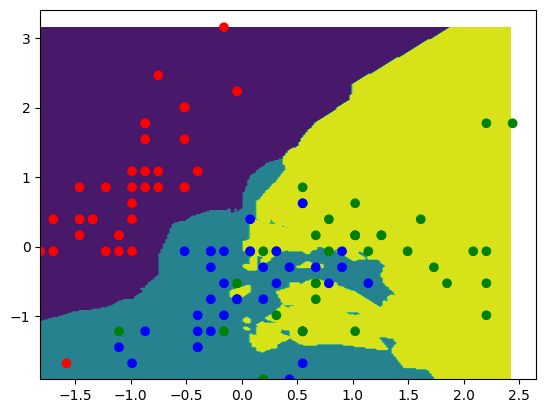

In [129]:
plt.contourf(xx, yy, predicted_classes.reshape(xx.shape))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap = ListedColormap(['red', 'blue', 'green']))